In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from adjustText import adjust_text
import os

In [17]:
os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage/LshCas13a_M13_infection")

In [18]:
LRTable = pd.read_csv("Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv", sep="\t")

#LRTable.loc[LRTable["MatchedFeatureType"].isin(["CDS", "tRNA"]) == False, "MatchedFeatureType"] = "other"

ylim=(0, max(-np.log10(LRTable["PValue.adj"].tolist()))*1.05)

In [19]:
set(LRTable.MatchedFeatureType)

{'CDS',
 'mobile_genetic_element',
 'ncRNA',
 'origin_of_replication',
 'pseudogene',
 'rRNA',
 'tRNA'}

In [20]:
top_N_cutoff = 100

tRNA
CDS


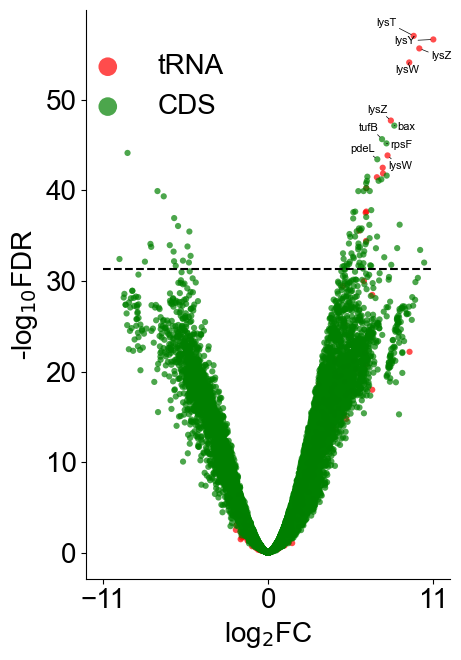

In [21]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,7))

LRT_volcano = figure.add_subplot()

colors_dict = {"tRNA" : "red", "CDS" : "green"}
dots_size=20
transparency=0.7

#features_list = set(WT_LRTable["MatchedFeatureType"].tolist()+LRTable["MatchedFeatureType"].tolist())

for feature in colors_dict.keys():
    print(feature)
    current_color = colors_dict[feature]
    
    LRT_volcano.scatter(x=LRTable[LRTable.MatchedFeatureType == feature]["logFC"].tolist(),
                           y=-np.log10(LRTable[LRTable.MatchedFeatureType == feature]["PValue.adj"].tolist()),
                           s=dots_size,
                           label=feature,
                           facecolors='none', 
                           edgecolors='none',
                           alpha=transparency,
                           c = current_color)

SelectedFeatures = LRTable.query("logFC > 0")[0:10]
SelectedFeatureLabels = []

for x, y, t in zip(SelectedFeatures["logFC"], 
                   -np.log10(SelectedFeatures["PValue.adj"]), 
                   SelectedFeatures["MatchedFeatureGene"]):
    SelectedFeatureLabels.append(LRT_volcano.text(x, y, t, size=8))

adjust_text(SelectedFeatureLabels, force_points=0.1, force_text=0.3,
            expand_points=(1, 1), expand_text=(1.6, 1.6),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

LRT_volcano.set_xlabel("log$_2$FC")
LRT_volcano.set_ylabel("-log$_{10}$FDR")
#LRT_volcano.set_title("A", size=15, weight='bold', loc='left')

LRT_volcano.spines['top'].set_visible(False)
LRT_volcano.spines['right'].set_visible(False)

hline_y = -np.log10(LRTable.loc[top_N_cutoff-1]["PValue.adj"])
min_x = -round(max(abs(LRTable["logFC"])))
max_x = round(max(abs(LRTable["logFC"])))
LRT_volcano.hlines(y = hline_y, xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)
LRT_volcano.xaxis.set_ticks([min_x, 0, max_x])

handles, labels = LRT_volcano.get_legend_handles_labels()
figure.legend(handles, labels, 
              loc="upper left", bbox_to_anchor=(0.15,0.93), frameon=False, markerscale=3)

figure.tight_layout()
figure.align_labels()

figure.savefig("Results/Pictures/EcC3000_M13_volcano_plot.png", 
               bbox_inches='tight',
               dpi=300)

tRNA
rRNA
CDS


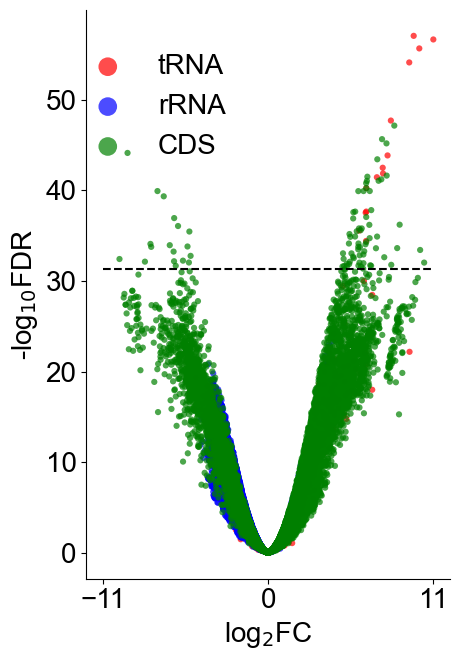

In [22]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,7))

LRT_volcano = figure.add_subplot()

colors_dict = {"tRNA" : "red", "rRNA" : "blue", "CDS" : "green"}
dots_size=20
transparency=0.7

#features_list = set(WT_LRTable["MatchedFeatureType"].tolist()+LRTable["MatchedFeatureType"].tolist())

for feature in colors_dict.keys():
    print(feature)
    current_color = colors_dict[feature]
    
    LRT_volcano.scatter(x=LRTable[LRTable.MatchedFeatureType == feature]["logFC"].tolist(),
                           y=-np.log10(LRTable[LRTable.MatchedFeatureType == feature]["PValue.adj"].tolist()),
                           s=dots_size,
                           label=feature,
                           facecolors='none', 
                           edgecolors='none',
                           alpha=transparency,
                           c = current_color)

# SelectedFeatures = LRTable.query("logFC > 0")[0:20]
# SelectedFeatureLabels = []

# for x, y, t in zip(SelectedFeatures["logFC"], 
#                    -np.log10(SelectedFeatures["PValue.adj"]), 
#                    SelectedFeatures["MatchedFeatureGene"]):
#     SelectedFeatureLabels.append(LRT_volcano.text(x, y, t, size=8))

# adjust_text(SelectedFeatureLabels, force_points=0.1, force_text=0.1,
#             expand_points=(1, 1), expand_text=(1.6, 1.6),
#             arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

LRT_volcano.set_xlabel("log$_2$FC")
LRT_volcano.set_ylabel("-log$_{10}$FDR")
#LRT_volcano.set_title("A", size=15, weight='bold', loc='left')

LRT_volcano.spines['top'].set_visible(False)
LRT_volcano.spines['right'].set_visible(False)

hline_y = -np.log10(LRTable.loc[top_N_cutoff-1]["PValue.adj"])
min_x = -round(max(abs(LRTable["logFC"])))
max_x = round(max(abs(LRTable["logFC"])))
LRT_volcano.hlines(y = hline_y, xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)
LRT_volcano.xaxis.set_ticks([min_x, 0, max_x])

handles, labels = LRT_volcano.get_legend_handles_labels()
figure.legend(handles, labels, 
              loc="upper left", bbox_to_anchor=(0.15,0.93), frameon=False, markerscale=3)

figure.tight_layout()
figure.align_labels()

figure.savefig("Results/Pictures/EcC3000_M13_volcano_plot_without_labels.png", 
               bbox_inches='tight',
               dpi=300)

tRNA
CDS
other


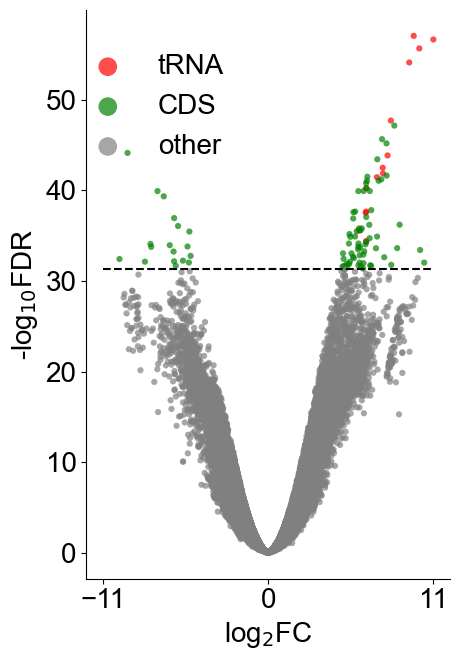

In [14]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,7))

LRT_volcano = figure.add_subplot()

colors_dict = {"tRNA" : "red", "CDS" : "green", "other" : "grey"}
dots_size=20
transparency=0.7

top_N_cutoff = 100
LRTable_modified = LRTable
LRTable_modified.loc[LRTable_modified[top_N_cutoff+1::].index, "MatchedFeatureType"] = "other"

for feature in colors_dict.keys():
    print(feature)
    current_color = colors_dict[feature]
    
    LRT_volcano.scatter(x=LRTable_modified[LRTable_modified.MatchedFeatureType == feature]["logFC"].tolist(),
                           y=-np.log10(LRTable_modified[LRTable_modified.MatchedFeatureType == feature]["PValue.adj"].tolist()),
                           s=dots_size,
                           label=feature,
                           facecolors='none', 
                           edgecolors='none',
                           alpha=transparency,
                           c = current_color)
    
hline_y = -np.log10(LRTable.loc[top_N_cutoff-1]["PValue.adj"])
min_x = -round(max(abs(LRTable["logFC"])))
max_x = round(max(abs(LRTable["logFC"])))

LRT_volcano.hlines(y = hline_y, xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)

LRT_volcano.xaxis.set_ticks([min_x, 0, max_x])

LRT_volcano.set_xlabel("log$_2$FC")
LRT_volcano.set_ylabel("-log$_{10}$FDR")
#LRT_volcano.set_title("A", size=15, weight='bold', loc='left')

LRT_volcano.spines['top'].set_visible(False)
LRT_volcano.spines['right'].set_visible(False)


handles, labels = LRT_volcano.get_legend_handles_labels()
figure.legend(handles, labels, 
              loc="upper left", bbox_to_anchor=(0.15,0.93), frameon=False, markerscale=3)

figure.tight_layout()
figure.align_labels()

figure.savefig(f"Results/Pictures/EcС3000_Ь13_volcano_plot_without_labels_top_{top_N_cutoff}_colored.png", 
               bbox_inches='tight',
               dpi=300)